## ANN - Classifier - Binary

**Import required libraries**

In [43]:
import keras # library for neural network. Need tensorflow to installed before performing this installation.
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split

In [44]:
# Reading data 
import pandas as pd

# from google.colab import files
# file = files.upload()
import io
# data = pd.read_csv(io.BytesIO(file['Churn_Modelling.csv']))

data = pd.read_csv('Churn_Modelling.csv')

'''data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()'''

"data = pd.read_csv('/content/Churn_Modelling.csv')\ndata.head()"

In [45]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Found 3617 zero balance values and it can be acceptable based on the type of the variable**

In [46]:
data['Balance'].isin([0]).sum()

3617

In [47]:
data.shape

(10000, 14)

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

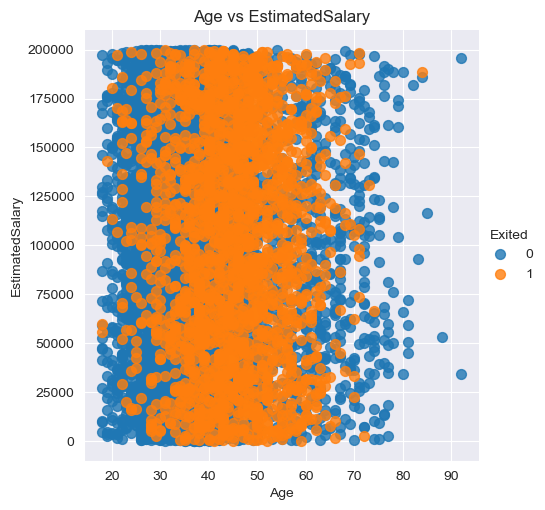

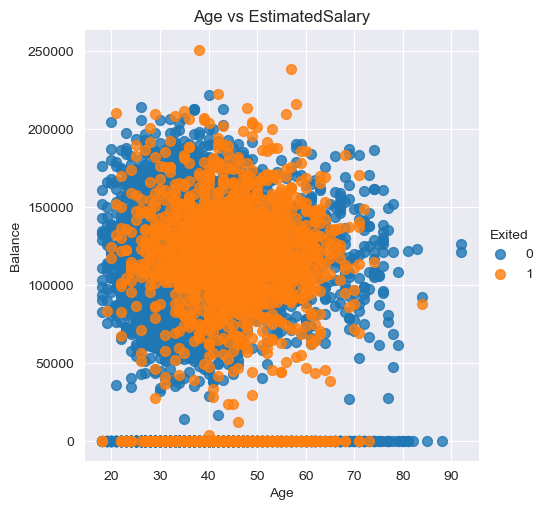

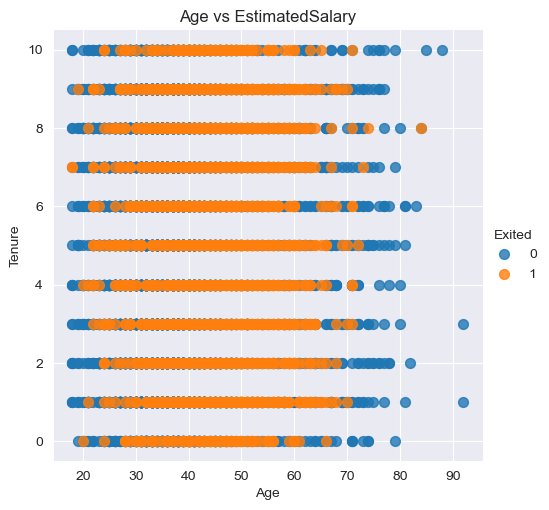

In [48]:
sns.lmplot(x = 'Age', y = 'EstimatedSalary', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Balance', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Tenure', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

plt.show()

Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

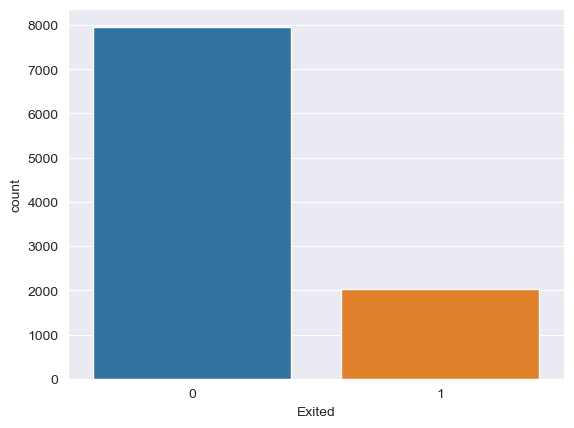

In [49]:
print(data["Exited"].value_counts())
sns.countplot(x = 'Exited', data = data)

**Coding TV**

In [50]:
data['Geography'] = pd.factorize(data['Geography'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


**Setting IV & TV**

In [51]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

y

array([1, 0, 1, ..., 1, 1, 0])

**Normalization**

In [52]:
X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.00941203 0.         0.         0.01041927 0.00345589 0.
  0.0061087  0.01190561 0.01393331 0.00877975]
 [0.00924477 0.00893962 0.         0.01017119 0.00172794 0.00849054
  0.0061087  0.         0.01393331 0.00974945]
 [0.00763302 0.         0.         0.01041927 0.01382355 0.01617517
  0.0183261  0.01190561 0.         0.00986978]]


In [53]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (8000, 10) y: (8000,)
Length of test set:  (2000, 10) y: (2000,)


### Neural network module

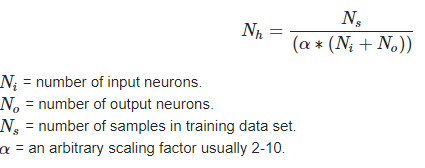

In [54]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils

In [55]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
# Specifically, the number of neurons comprising that layer is equal to the number of features (columns) in your data.
classifier.add(Dense(units= 300, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
# If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Sigmoid due to binary classification
classifier.add(Dropout(0.2))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model 
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

classifier.summary()

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 0.9895 - accuracy: 0.7580 - val_loss: 0.5086 - val_accuracy: 0.7925
Epoch 2/100
250/250 [==============================] - 2s 9ms/step - loss: 1.0322 - accuracy: 0.7972 - val_loss: 0.5257 - val_accuracy: 0.7925
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.9931 - accuracy: 0.7972 - val_loss: 0.5085 - val_accuracy: 0.7925
Epoch 4/100
250/250 [==============================] - 2s 9ms/step - loss: 0.9606 - accuracy: 0.7977 - val_loss: 0.4695 - val_accuracy: 0.7925
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 1.0078 - accuracy: 0.8000 - val_loss: 0.4771 - val_accuracy: 0.7925
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.9647 - accuracy: 0.7983 - val_loss: 0.4643 - val_accuracy: 0.7935
Epoch 7/100
250/250 [==============================] - 2s 9ms/step - loss: 0.9938 - accuracy: 0.8004 - val_loss: 0.4570 - val_accuracy: 0.799

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", cm)
print("\nclassification_report: \n", classification_report(y_test, y_pred))

Accuracy:  0.7845

Confusion Matrix: 
 [[1542   43]
 [ 388   27]]

classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1585
           1       0.39      0.07      0.11       415

    accuracy                           0.78      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.71      0.78      0.72      2000



**Model Accuracy**

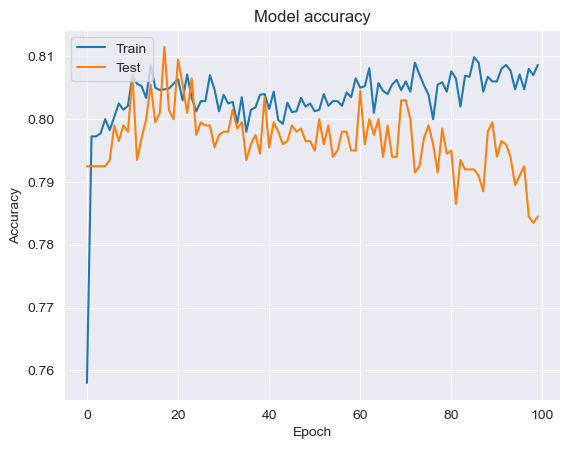

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

ANN with Callbacks

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint

In [60]:
classifier = Sequential()

# define the IL and first HL
classifier.add(Dense(units = 350, kernel_initializer = 'random_normal', activation = 'relu', input_dim = 10))
classifier.add(Dropout(0.2)) # preventing overfitting

# define another HL with 250 units and Dropout of 0.2
classifier.add(Dense(units = 250, kernel_initializer = 'random_normal', activation = 'relu'))
classifier.add(Dropout(0.2))

# OL
classifier.add(Dense(units = 1, kernel_initializer = 'random_normal', activation = 'sigmoid')) # TV is binary....  for regression activation = 'linear'
classifier.add(Dropout(0.2)) # preventing overfitting

# compile
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # metrics = ['mse'], loss = 'mean_squared_error'

classifier.summary()

# model checkpoint
file = 'Best_DNN_Model.hdf5'
checkpoint = ModelCheckpoint (file, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 350)               3850      
                                                                 
 dropout_3 (Dropout)         (None, 350)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               87750     
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 251       
                                                                 
 dropout_5 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 91,851
Trainable params: 91,851
Non-trai

In [61]:
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 100, callbacks = callbacks_list)

Epoch 1/100
246/250 [============================>.] - ETA: 0s - loss: 0.9761 - accuracy: 0.7730
Epoch 1: val_accuracy improved from -inf to 0.79250, saving model to Best_DNN_Model.hdf5
250/250 [==============================] - 3s 10ms/step - loss: 0.9715 - accuracy: 0.7732 - val_loss: 0.5087 - val_accuracy: 0.7925
Epoch 2/100
244/250 [============================>.] - ETA: 0s - loss: 0.9995 - accuracy: 0.7974
Epoch 2: val_accuracy did not improve from 0.79250
250/250 [==============================] - 2s 9ms/step - loss: 0.9952 - accuracy: 0.7972 - val_loss: 0.4982 - val_accuracy: 0.7925
Epoch 3/100
244/250 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.7965
Epoch 3: val_accuracy did not improve from 0.79250
250/250 [==============================] - 2s 9ms/step - loss: 0.9653 - accuracy: 0.7976 - val_loss: 0.4998 - val_accuracy: 0.7925
Epoch 4/100
248/250 [============================>.] - ETA: 0s - loss: 0.9758 - accuracy: 0.7973
Epoch 4: val_accuracy did n

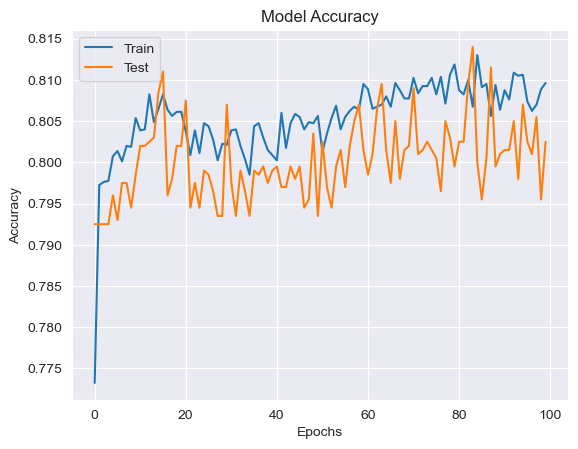

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [63]:
classifier.load_weights('Best_DNN_Model.hdf5')
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[1566   19]
 [ 353   62]]

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1585
           1       0.77      0.15      0.25       415

    accuracy                           0.81      2000
   macro avg       0.79      0.57      0.57      2000
weighted avg       0.81      0.81      0.76      2000



**Grid Search CV**

In [65]:
# pip install scikeras[tensorflow]

In [66]:
def build_model():
  model = Sequential()

  # Adding the input layer and the first hidden layer
  # Specifically, the number of neurons comprising that layer is equal to the number of features (columns) in your data.
  model.add(Dense(units= 300, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
  model.add(Dropout(0.2))

  # Adding the second hidden layer
  model.add(Dense(units = 300, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dropout(0.2))

  # Adding the output layer
  # If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Sigmoid due to binary classification
  model.add(Dropout(0.2))

  # Compiling Neural Network
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

from scikeras.wrappers import KerasClassifier # pip install scikeras[tensorflow]
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(model = build_model, verbose = 2)

batch_size = [16, 32, 64]
epochs = [50, 100, 150]
param_grid = dict(batch_size = batch_size, epochs = epochs)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1)

grid_search = grid_search.fit(X_train,y_train)

print('\nBest parameters', grid_search.best_params_)
print('\nBest accuracy', grid_search.best_score_)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


2023-07-05 21:16:22.077679: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.088336: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.100513: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.185635: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50


2023-07-05 21:16:22.422908: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.429041: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.454736: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.456169: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.470816: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-05 21:16:22.474833: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
450/450 - 7s - loss: 1.1867 - accuracy: 0.7815 - 7s/epoch - 15ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1327 - accuracy: 0.7794 - 7s/epoch - 15ms/step
Epoch 2/50
450/450 - 7s - loss: 1.2230 - accuracy: 0.7804 - 7s/epoch - 15ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1602 - accuracy: 0.7812 - 7s/epoch - 15ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1851 - accuracy: 0.7818 - 7s/epoch - 15ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1153 - accuracy: 0.7790 - 7s/epoch - 16ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1811 - accuracy: 0.7778 - 7s/epoch - 16ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1763 - accuracy: 0.7800 - 7s/epoch - 16ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1610 - accuracy: 0.7800 - 7s/epoch - 16ms/step
Epoch 2/50
450/450 - 7s - loss: 1.1949 - accuracy: 0.7776 - 7s/epoch - 16ms/step
Epoch 2/50
450/450 - 5s - loss: 1.1589 - accuracy: 0.7974 - 5s/epoch - 12ms/step
Epoch 3/50
450/450 - 5s - loss: 1.1432 - accuracy: 0.7

**Tuning using Keras Tuner**

A faster technique from Keras

In [67]:
# pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [68]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

def build_model(hp):
  model = Sequential()
  hp_units = hp.Int('HL', min_value=70, max_value=400, step=1)
  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  hp_epochs = hp.Int('Epochs', min_value=5, max_value=100, step=1)
  hp_batch = hp.Choice('Batch Size', [8, 16, 32, 64, 128])
  hp_optimizers = hp.Choice('Optimizer', ['sgd', 'adam', 'rmsprop'])

  model.compile(optimizer = hp_optimizers, loss='binary_crossentropy', metrics = ['accuracy'])
  return model

tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [70]:
for h_param in [f"HL" for i in range(1)] + [f"Epochs" for i in range(1)] + ['Batch Size'] + ['Optimizer']:
  print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

HL 99
Epochs 31
Batch Size 64
Optimizer adam


In [71]:
tuner.results_summary(num_trials=10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
HL: 99
Epochs: 31
Batch Size: 64
Optimizer: adam
Score: 0.8159999847412109

Trial 0 summary
Hyperparameters:
HL: 256
Epochs: 55
Batch Size: 64
Optimizer: rmsprop
Score: 0.815500020980835

Trial 1 summary
Hyperparameters:
HL: 277
Epochs: 10
Batch Size: 64
Optimizer: adam
Score: 0.8149999976158142

Trial 4 summary
Hyperparameters:
HL: 118
Epochs: 12
Batch Size: 32
Optimizer: sgd
Score: 0.7925000190734863

Trial 3 summary
Hyperparameters:
HL: 305
Epochs: 24
Batch Size: 16
Optimizer: sgd
Score: 0.7925000190734863


In [72]:
best_model = tuner.get_best_models(num_models=1)[0]

In [73]:
best_model.build(X_train.shape)

In [74]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (8000, 99)                1089      
                                                                 
 dense_1 (Dense)             (8000, 1)                 100       
                                                                 
Total params: 1,189
Trainable params: 1,189
Non-trainable params: 0
_________________________________________________________________


In [75]:
# model checkpoint
file = 'Best_Model.hdf5'
checkpoint = ModelCheckpoint (file, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

history = best_model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), callbacks = callbacks_list)

Epoch 1/100
242/250 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.8113
Epoch 1: val_accuracy improved from -inf to 0.81650, saving model to Best_Model.hdf5
250/250 [==============================] - 2s 7ms/step - loss: 0.4360 - accuracy: 0.8111 - val_loss: 0.4343 - val_accuracy: 0.8165
Epoch 2/100
241/250 [===========================>..] - ETA: 0s - loss: 0.4351 - accuracy: 0.8119
Epoch 2: val_accuracy did not improve from 0.81650
250/250 [==============================] - 2s 7ms/step - loss: 0.4356 - accuracy: 0.8116 - val_loss: 0.4348 - val_accuracy: 0.8130
Epoch 3/100
246/250 [============================>.] - ETA: 0s - loss: 0.4343 - accuracy: 0.8112
Epoch 3: val_accuracy did not improve from 0.81650
250/250 [==============================] - 2s 7ms/step - loss: 0.4358 - accuracy: 0.8102 - val_loss: 0.4337 - val_accuracy: 0.8135
Epoch 4/100
245/250 [============================>.] - ETA: 0s - loss: 0.4373 - accuracy: 0.8105
Epoch 4: val_accuracy did not im

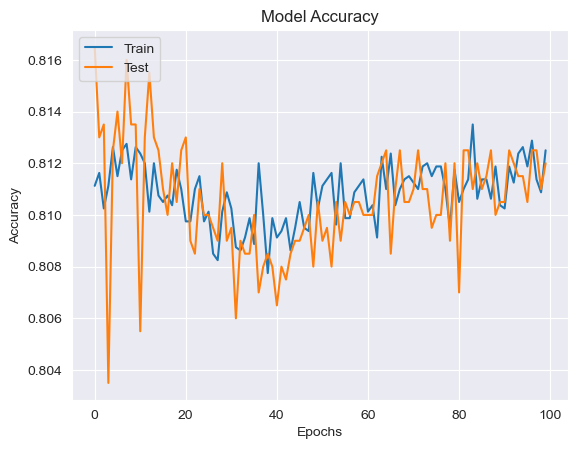

In [76]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()